# Evaluation of FP Optik Grundpraktikum

## Polarization optics

### Polarizers and wave plates

See protocol. 

## Electro-optic effect

### Phase shift due to EOM

#### Characterization of the high voltage supply

To measure the amplification factor of the high voltage amplifier, we connect the function generator (with a DC signal) to the oscilloscope. We then change the amplitude on the function generator and read the input voltage from the oscilloscope and the output voltage from the amplifier.

Finally we plot input vs output voltage, add an linear fit and from the slope of the linear function we can evaluate the amplification factor.

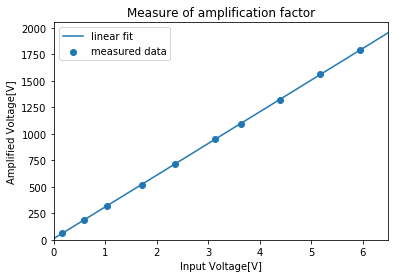

The amplification factor is roughly 298.87


In [1]:
# plot and compute amplification factor
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

V_in = [0.160, 0.592, 1.036, 1.712, 2.350, 3.127, 3.632, 4.389, 5.174, 5.948]
V_in = np.array(V_in)
V = np.linspace(0, 6.5, 65)
V_out = [60., 190., 320., 520., 710., 950., 1090., 1320., 1560., 1790.]
V_out = np.array(V_out)

def linfunc(x, a, b):
    return a * x + b

fitp, pcov = curve_fit(linfunc, V_in, V_out, [300., 1.])
plt.plot(V, linfunc(V, fitp[0], fitp[1]), label='linear fit')
plt.scatter(V_in, V_out, label='measured data')
plt.title("Measure of amplification factor")
plt.xlabel("Input Voltage[V]")
plt.ylabel("Amplified Voltage[V]")
plt.legend()
plt.xlim(0, 6.5)
plt.ylim(0, 2050)
plt.show()

print("The amplification factor is roughly", round(fitp[0], 2))
enlarge = fitp[0]

Since we want the High Voltage for the Pockels Cell to stay below 1.8 kV, we should not exceed ~6V on the oscilloscope for the input Voltage.

#### Mach-Zehnder interferometer

First we set up the elements like figure 7 in the script, without the Pockels cell, to verify a good overlap between the two arms at the output of the pre-aligned Interferometer. We changed the height and angle of the elements, to ensure the two light spots are parallel to each other after the second beam splitter and overlap at the iris. 

Then we connect channel 2 of the oscilloscope to the photodiode, to monitor the voltage so it does not exceed 3V. We place the Pockels Cell in the path of the transmitted light after the first beam splitter. 

To determine the directions of the optical axes (fast/slow axes) of the Pockels cell, we rotate the Pockels cell and observed the direction of the electrode in the cell. We find the optical axes at 0° and 90°.

We then connect the Pockels cell to the filter box and turn on the high voltage power supply. We produce a triangle signal with the function generator. At 0° of the Pockels cell we measure the output intensity as a function of the applied voltage on the Pockels cell by saving the data from oscilloscope, where CH1 shows input voltage on function generator and CH2 shows read out voltage of the photodiode. We do the same at $\pm 90°$. 

Figure 1: at 0°
![tek00000.png](tek00000.png)

Figure 2: at -90°
![tek00001.png](tek00001.png)

According to formula in the script, the intensity we measured (~ Voltage on photodiode) is as follow related to half-wave Voltage $U_{\pi}$: $I_{out} = I_{in} * \cos^2(\frac{\phi_0}{2}-\frac{\pi}{2}\frac{V}{U_{\pi}})$ where $V$ is the applied voltage on Pockels cell.

In our case ${\phi_0} = 0$ and because we measured the relative intensity we fit the intensity data using $I_{out} = I_{in} * \cos^2(\frac{\pi}{2}\frac{V}{U_{\pi}}) + b$ with fitting parameter $I_{in}, U_{\pi}$ and $b$. In this way we can determine $U_{\pi}$.  

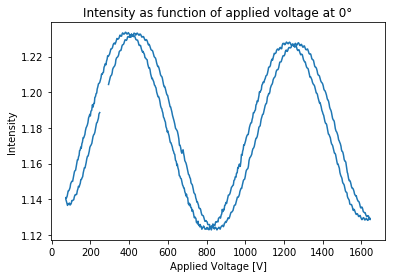

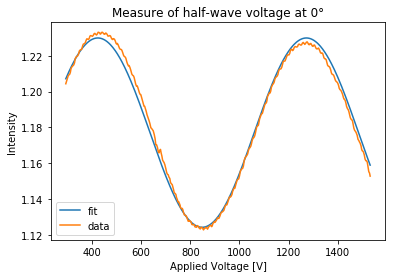

At 0°: U_pi = 424.01 +- 0.24 V
[-1.05692838e-01  4.24011399e+02  1.22993313e+00]


In [5]:
# plot and fit 0°
def func(V, I_in, U_pi, b):
    return I_in * ((np.cos(np.pi * (V / U_pi) / 2))**2) + b

U0, I0 = np.loadtxt('Pockel0.txt', skiprows=1, usecols=(1, 2), unpack=True)
# the applied voltage = amplification factor * input voltage on function generator
U0 = np.array(U0) * enlarge
I0 = np.array(I0)
plt.plot(U0, I0, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at 0°")
plt.show()
# So the plot shows us that the intensity for the same applied voltage varis when the applied voltage rises and falls
# here we only use the data when the applied voltage rises, because it has no influence on evaluation of U_pi
U0 = U0[0:400]
I0 = I0[0:400]
fitp, pcov = curve_fit(func, U0, I0, [-0.1, 400., 1.12])
plt.plot(U0, func(U0, fitp[0], fitp[1], fitp[2]), label='fit')
plt.plot(U0, I0, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Measure of half-wave voltage at 0°")
plt.legend()
plt.show()
print("At 0°: U_pi = %.2f" % fitp[1], "+- %.2f" % np.sqrt(pcov[1][1]), "V")
print(fitp)

# Fit with an additional phase shift:
# def funcp(V, I_in, U_pi, b, p):
#     return I_in * ((np.cos(np.pi * (V / U_pi) / 2 + p))**2) + b
# fitp2, pcov2 = curve_fit(funcp, U0, I0, [0.1, 400., 1.12, 1.])
# plt.plot(U0, funcp(U0, fitp2[0], fitp2[1], fitp2[2], fitp2[3]), label='fit')
# plt.plot(U0, I0, label="data")
# plt.xlabel("Applied Voltage [V]")
# plt.ylabel("Intensity")
# plt.title("Measure of half-wave voltage at 0°")
# plt.legend()
# plt.show()
# print("Fit with an additional phase shift:")
# print("At 0°: U_pi = %.2f" % fitp2[1], "+- %.2f" % np.sqrt(pcov2[1][1]), "V")
# print(fitp2)

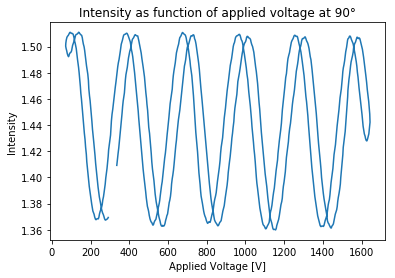

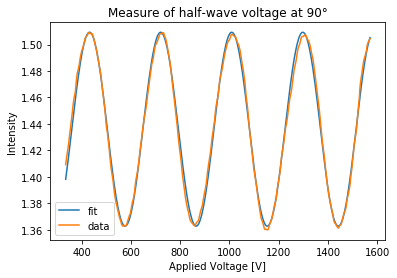

At 90°: U_pi = 144.19 +- 0.03 V
[ -0.14655793 144.18550537   1.50928054]


In [7]:
# plot and fit 90°
U90, I90 = np.loadtxt('Pockel90.txt', skiprows=1, usecols=(1, 2), unpack=True)
U90 = np.array(U90) * enlarge
I90 = np.array(I90)
plt.plot(U90, I90, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at 90°")
plt.show()
U90 = U90[0:400]
I90 = I90[0:400]
fitp, pcov = curve_fit(func, U90, I90, [-0.14, 140., 1.36])
plt.plot(U90, func(U90, fitp[0], fitp[1], fitp[2]), label='fit')
plt.plot(U90, I90, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Measure of half-wave voltage at 90°")
plt.legend()
plt.show()
print("At 90°: U_pi = %.2f" % fitp[1], "+- %.2f" % np.sqrt(pcov[1][1]), "V")
print(fitp)

# Fit with an additional phase shift:
# fitp2, pcov2 = curve_fit(funcp, U90, I90, [0.14, 140., 1.36, 1.6])
# plt.plot(U90, funcp(U90, fitp2[0], fitp2[1], fitp2[2], fitp2[3]), label='fit')
# plt.plot(U90, I90, label="data")
# plt.xlabel("Applied Voltage [V]")
# plt.ylabel("Intensity")
# plt.title("Measure of half-wave voltage at 90°")
# plt.legend()
# plt.show()
# print("Fit with an additional phase shift:")
# print("At 90°: U_pi = %.2f" % fitp2[1], "+- %.2f" % np.sqrt(pcov2[1][1]), "V")
# print(fitp2)

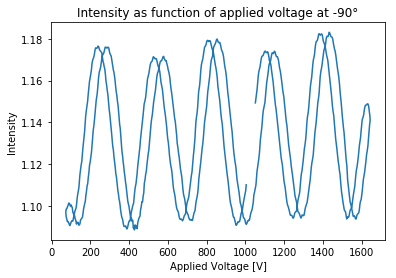

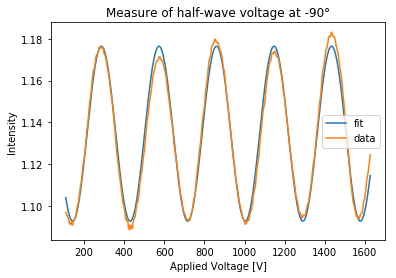

At -90°: U_pi = 143.37 +- 0.04 V
[8.37612088e-02 1.43371326e+02 1.09268399e+00]


In [8]:
# plot and fit -90°
U_90, I_90 = np.loadtxt(
    'Pockel_90.txt', skiprows=1, usecols=(1, 2), unpack=True)
U_90 = np.array(U_90) * enlarge
I_90 = np.array(I_90)
plt.plot(U_90, I_90, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at -90°")
plt.show()
U_90 = U_90[310:800]
I_90 = I_90[310:800]
fitp, pcov = curve_fit(func, U_90, I_90, [0.08, 140., 1.09])
plt.plot(U_90, func(U_90, fitp[0], fitp[1], fitp[2]), label='fit')
plt.plot(U_90, I_90, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Measure of half-wave voltage at -90°")
plt.legend()
plt.show()
print("At -90°: U_pi = %.2f" % fitp[1], "+- %.2f" % np.sqrt(pcov[1][1]), "V")
print(fitp)

# Fit with an additional phase shift:
# fitp2, pcov2 = curve_fit(funcp, U_90, I_90, [0.08, 140., 1.09, 0.1])
# plt.plot(
#     U_90, funcp(U_90, fitp2[0], fitp2[1], fitp2[2], fitp2[3]), label='fit')
# plt.plot(U_90, I_90, label="data")
# plt.xlabel("Applied Voltage [V]")
# plt.ylabel("Intensity")
# plt.title("Measure of half-wave voltage at 90°")
# plt.legend()
# plt.show()
# print("Fit with an additional phase shift:")
# print("At 90°: U_pi = %.2f" % fitp2[1], "+- %.2f" % np.sqrt(pcov2[1][1]), "V")
# print(fitp2)

TODO: why there's fluctuation of peaks at 90°

The difference between +90° and -90° is a "Phase shift" of $\frac{\pi}{2}$. 
Since $U_{\pi}$ depends on the property of the Pockels Cell and the axis along which the light travels, we can use it to calculate the Pockels coefficient $r_{13}$ using $U_{\pi,0°} =\frac{d\lambda}{Lr_{13}n_o^3}$ and $r_{33}$ using $U_{\pi,\pm90°} = \frac{d\lambda}{Lr_{33}n_e^3}$. From table 1 of the Script we read: distance of electrodes $d = 2$ mm, crystal length $L = 20$ mm, optical wavelength $\lambda = 632.8$ nm, indices of refraction at $\lambda = 633$ nm: $n_0=2.286$ and $n_e=2.200$. 

After transforming the equations we get $r_{13,33} = \frac{d\lambda}{LU_{\pi}n_{e,o}^3}$ and for the error we get $\Delta r_{13,33} = \frac{\Delta U_{\pi}d\lambda}{LU_{\pi}^2n_{e,o}^3}$  .

Thus with the fit results  we get: 

* $U_{\pi,0°}= 424.01 \pm 0.24$ V $\rightarrow$ $r_{13} = (12.79\pm0.01)\cdot10^{-12}$

* $U_{\pi,+90°}= 144.19 \pm 0.03$ V $\rightarrow$ $r_{33,+} = (41.22\pm0.01)\cdot10^{-12}$

* $U_{\pi,-90°}= 143.37 \pm 0.04$ V $\rightarrow$ $r_{33,-} = (41.45\pm0.01)\cdot10^{-12}$

* $r_{33,avg} = \frac{r_{33,+} + r_{33,-}}{2}= (41.34\pm0.01)\cdot10^{-12}$

(Note: the error can be misleading)

On the script the theoretical values of Pockels Coefficient for the material are given by $r_{13}=9.6\cdot10^{-12}, r_{33}=30.8\cdot10^{-12}$ or $r_{13}=9.6\cdot10^{-12}, r_{33}=32.6\cdot10^{-12}$. So our measurement are about 50% larger than therotical value. We think the reason for that is that the Pockels coefficient has a strong dependence on the condition of the crystal(e.g. purity).

(Note: the value of I_in of fit parameter is negative: Since we used lots of fit parameter here, it has to do with b, I_in and missing phase shift, which may comes from not perfect aligned set-up)

### Polarization Manipulation / Intensity Modulation

Then we set up the elements like in figure 8 of the script and do the same measurements for $\pm45°$.

We use a beam splitter before the iris to reduce the intensity that reaches the photo diode, otherwise it would exceed 3V.

We get the following waveform:

At 45°:
![45.png](45.png)

At -45°:
![_45.png](_45.png)

According to the theory the two waveforms should look very similar besides being mirrored. Here, however, we see some differences. We believe there was something wrong with the cabels or the filter box cause we had this noise the whole time during this part (which was done on later date, since the first date was missing Intensity in the .csv). We tried to change the photodiode and the pockels cell but there was no improvement. We also turned off all other lights to reduce a possible background intensity noise but nothing changed. 

Note: the pictures are taken from the measurements on 18th Jan., because we found out that we saved false data at the first time. However, the pictures, which were taken from the measure on 12th Dec., show what we would have expected from $\pm$ 45 without the noise. See below:

At 45°:
![tek00005.png](tek00005.png)

At -45°:
![tek00006.png](tek00006.png)

The difference between +45° and -45° is a "Phase shift" of $\frac{\pi}{2}$ . 
The first intensity maximum is not at 0V for pockels cell at -45°. TODO: Why?

Now we input the data of applied voltage and output intensity and fit it with the formula on script $T(V)=\sin^2{(\frac{\phi_0}{2}-\frac{\pi}{2}\frac{V}{V_\pi})}$ with $\phi_0 = \frac{2\pi}{\lambda}(n_e-n_0)L$, $V_\pi = \frac{d}{L} \frac{\lambda}{(r_{33}n_e^3-r_{13}n_0^3)}$. Since we measured the relative intensity here, we use the fit function $I_{out} = I_{in} * \sin^2{(\frac{\phi_0}{2}-\frac{\pi}{2}\frac{V}{V_{\pi}})} + b$ with fitting parameter $I_{in}, V_{\pi}$ and $b$. (TODO: Why is sinus here??)



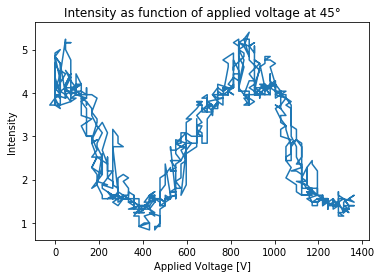

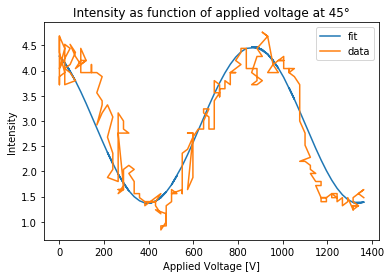

[ -3.10286329 470.44980898   4.47103822]
At 45°: V_pi = 470.45 +- 2.46 V


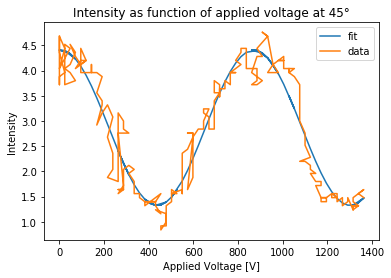

[  3.08055006 432.26770974   1.32586587   1.83663994]
At 45°: V_pi = 432.27 +- 3.41 V


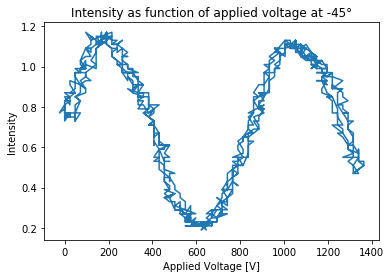

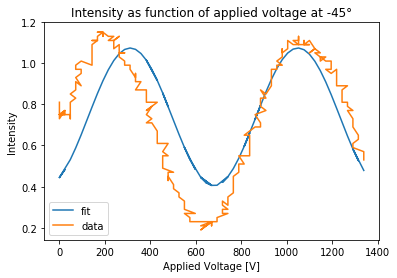

[  0.66874027 369.12989229   0.40483363]
At -45°: V_pi = 369.13 +- 2.73 V


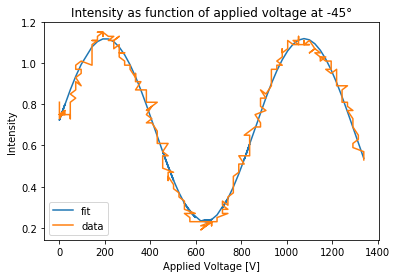

[ 8.88994204e-01  4.36953561e+02  2.30109523e-01 -5.95166710e-01]
At -45°: V_pi = 436.95 +- 1.25 V


In [9]:
# plot and fit 45°
lamb = 632.8e-9
ne = 2.2
n0 = 2.286
L = 20e-3


def func45(V, I_in, V_pi, b):
    return I_in * (
        (np.sin(np.pi / lamb * (ne - n0) * L - np.pi * (V / V_pi) / 2))**2) + b


U45, I45 = np.loadtxt('Pockel45.txt', skiprows=1, usecols=(0, 1), unpack=True)
plt.plot(U45 * enlarge, I45, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at 45°")
plt.show()
# here I only used the data when the applied voltage rises within a period
U45 = U45[120:378] * enlarge
I45 = I45[120:378]
fitp, pcov = curve_fit(func45, U45, I45, [-3., 400., 4.5])
plt.plot(U45, func45(U45, fitp[0], fitp[1], fitp[2]), label='fit')
plt.plot(U45, I45, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at 45°")
plt.legend()
plt.show()
print(fitp)
print("At 45°: V_pi = %.2f" % fitp[1], "+- %.2f" % np.sqrt(pcov[1][1]), "V")


# Fit with an additional phase shift
def func45p(V, I_in, V_pi, b, p):
    return I_in * ((np.sin(np.pi / lamb * (ne - n0) * L - np.pi *
                           (V / V_pi) / 2 + p))**2) + b


fitp2, pcov2 = curve_fit(func45p, U45, I45, [3., 400., 1.2, 1.5])
plt.plot(
    U45, func45p(U45, fitp2[0], fitp2[1], fitp2[2], fitp2[3]), label='fit')
plt.plot(U45, I45, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at 45°")
plt.legend()
plt.show()
print(fitp2)
print("At 45°: V_pi = %.2f" % fitp2[1], "+- %.2f" % np.sqrt(pcov2[1][1]), "V")

U_45, I_45 = np.loadtxt(
    'Pockel_45.txt', skiprows=1, usecols=(0, 1), unpack=True)
plt.plot(U_45 * enlarge, I_45, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at -45°")
plt.show()
# here I only used the data when the applied voltage rises within a period
U_45 = U_45[400:655] * enlarge
I_45 = I_45[400:655]
fitp, pcov = curve_fit(func45, U_45, I_45, [0.4, 300., 0.2])
plt.plot(U_45, func45(U_45, fitp[0], fitp[1], fitp[2]), label='fit')
plt.plot(U_45, I_45, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at -45°")
plt.legend()
plt.show()
print(fitp)
print("At -45°: V_pi = %.2f" % fitp[1], "+- %.2f" % np.sqrt(pcov[1][1]), "V")

fitp2, pcov2 = curve_fit(func45p, U_45, I_45, [0.4, 300., 0.2, 1.])
plt.plot(
    U_45, func45p(U_45, fitp2[0], fitp2[1], fitp2[2], fitp2[3]), label='fit')
plt.plot(U_45, I_45, label="data")
plt.xlabel("Applied Voltage [V]")
plt.ylabel("Intensity")
plt.title("Intensity as function of applied voltage at -45°")
plt.legend()
plt.show()
print(fitp2)
print("At -45°: V_pi = %.2f" % fitp2[1], "+- %.2f" % np.sqrt(pcov2[1][1]), "V")

* The theoretical value given by the script is $V_\pi\approx 380$ V. 

Calculation of the half-wave voltage in different ways, followed by reasoning for the deviation: 

* From the two measurements we get $V_\pi = \frac{432.27+436.95}{2}=424.61$ V, which is about 11.7% larger than theoretical value. It can be explained by the mysterious(?) phase shift of the 45°-curve. 

* We use the formula $V_\pi = \frac{d}{L} \frac{\lambda}{(r_{33}n_e^3-r_{13}n_0^3)}$ again to calculate $V_\pi^{calc}$ by using previously measured values of $r_{13}$ and $r_{33}$: $V_\pi^{calc} = \frac{2e-3}{20e-3} \frac{632.8e-9}{(2.2^3\times41.34\cdot10^{-12}-2.286^3\times 12.79\cdot10^{-12})}\approx220.18$ V, which is about 42.0% smaller than theoretical value. It can be explained by the non-purity of the crystal, which causes the Pockels coefficient being too large. 

* Using the measured $(U_\pi)_e, (U_\pi)_o$ we also can calculate $V_\pi^{calc'}=\frac{1}{\frac{1}{(U_\pi)_e}-\frac{1}{(U_\pi)_o}} \approx 217.55$ V, which is about 42.8% smaller than theoretical value. It can be explained by same argument at last point.(?)

#### 2.2.1 Linear amplitude modulation

With the same set-up we can modulate the Intensity with a frequency. For that we set the applied voltage to the Pockel Cell to a value where the Intensity shows a linear dependency and add ontop of the constant voltage another small Voltage via the Filter box.

We use the "internal" setting of the high voltage supply to apply a DC offset voltage of $V_0 = 0.56$ kV and we can see how the added modulation disappears from the intensity. See below with Channel 3 added modulation and Channel 2 Intensity:
![tek00007.png](tek00007.png)

Then we use the function generator for a high frequency signal (~ kHz)(In our case ~0.5 kHz but it shows good modulation). With the given half-wave voltage $V_\pi\approx380$V we calculate a voltage where the intensity output shows an almost linear dependency, according to the figure 9 on script: $V = \frac{V_\pi}{2} + V_0= 0.74$ kV:
![tek00008.png](tek00008.png)

We see that the output signal has a retardation with respect to added signal. But it modulates the frequency successfully.

TODO: We tried to vary the offset voltage for the Pockels cell to optimize the modulation efficiency of the set-up... what happened? why is that? At which points can you improve the signal-to-noise ratio? e.g. laser power, high voltage, modulation amplitude... -- We didn't do this stuff hence can't judge.

## Acousto-Optic Effect

### Acousto-Optic Modulation

#### Experiments with a single AOM

First we measure the distance between the end of the AOM and the screen $d = 193.5 cm$. Then we measure the distance between two first maxima of diffraction pattern for different frequencies from 85 MHz to 132.3 MHz with a step size of approximately 6 MHz. Instead of measuring the distance between 0. maximum and 1. maximum we do it between 1. maxima, that way we double the measured distance to reduce the systematic error. The same we do for the second maximum distance. 

From the two distances we can calculate the diffraction angle using the arctan-function. Then we plot the diffraction angle as a function of the frequency.

Since the diffraction of the light in this experiment can be explained with the Debye-Sears-effect, the grating element for the diffraction should be equal to the wavelength of the sound waves $\lambda_S$. For the Bragg angle $\theta_B$ we get $\sin{\theta_B} = \frac{1}{2}\frac{m\lambda}{\lambda_S}$, where $\lambda = 632.8$ nm is the optical wavelength and $m$ is the order of maximum. Thus we calculate $\lambda_S$ based on deformation of this formula $\lambda_S =\frac{1}{2}\frac{632.8m}{\sin{\theta_B}}$.

Since the crystal is thin enough, that it behaves as a phase grating with period $T$ equal to the wavelength of the sound wave $\lambda_S$. We can calculate the sound velocity by using $v_S =\frac{L}{T} =f\cdot\lambda_S$, with $L = 20 $ mm being the interaction length of the light beam with the sound wave. 

The theoretical sound velocity in the crystal given by the script is $v_S = 4260$ m/s

TO ANSWER: On how many grating periods does the light diffract?

In [ ]:
# diffraction angle and sound wave length
f = np.array([85., 91., 97.5, 104.1, 110.0, 115.6, 121., 126.5, 132.3])
# unit of f is MHz
df = np.array([.5,.5,.3,.3,.4,.4,.4,.2,.2])
d = 193.5
dd = 0.2

x1 = np.array([5., 5.4, 5.8, 6.1, 6.5, 6.8, 7.1, 7.4, 7.8])
dx1 = np.array([.1,.1,.1,.1,.1,.1,.1,.1,.1])
angle01 = np.arctan(x1/2/d)
dangle01 = 1/(1+(x1/2/d)**2)*np.sqrt((dx1/2/d)**2+(x1*dd/2/d/d)**2)

x2 = np.array([10.0,10.7,11.5,12.3,13.0])
dx2 = np.array([.1,.1,.1,.1,.1])
angle02 = np.arctan(x2/2/d)
dangle02 = 1/(1+(x2/2/d)**2)*np.sqrt((dx2/2/d)**2+(x2*dd/2/d/d)**2)

def Bragg (m,theta_B):
    return 632.8e-9*m/2/np.sin(theta_B)
def dBragg (m, theta_B, dtheta_B):
    return 632.8e-9*m*np.cos(theta_B)*dtheta_B/2/np.sin(theta_B)**2

plt.errorbar(f, angle01, xerr = df, yerr = dangle01, fmt=".", label="data")
plt.title("Diffraction angle of 1. order at different frequencies")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Diffraction angle [rad]")
plt.legend()
plt.show()
print("Sound wave wavelength calculated from diffraction angle of 1. order at different frequencies: ")
print(np.around(Bragg(1,angle01),8))

plt.errorbar(f[0:5], angle02, xerr = df[0:5], yerr = dangle02, fmt=".", label="data")
plt.title("Diffraction angle of 2. order at different frequencies")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Diffraction angle [rad]")
plt.legend()
plt.show()
print("Sound wave wavelength calculated from diffraction angle of 2. order at different frequencies: ")
print(np.around(Bragg(2,angle02),8))


plt.errorbar(f, Bragg(1,angle01), xerr = df, yerr = dBragg(1, angle01, dangle01), fmt=".", label="1. order")
plt.errorbar(f[0:5], Bragg(2,angle02), xerr = df[0:5], yerr = dBragg(2, angle02, dangle02), fmt=".", label="2. order")
plt.title("Sound wave wavelength at different frequencies")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Wavelength [m]")
plt.legend()
plt.show()
print("Sound velocity calculated from diffraction angle of 1. order at different frequencies: ")
print(np.around(f*10**6*Bragg(1,angle01),1))
print("Sound velocity calculated from diffraction angle of 2. order at different frequencies: ")
print(np.around(f[0:5]*10**6*Bragg(2,angle02),1))

TODO: the sound velocity is only ~half of theoretical value. Possible reason: in our case the grating is not thin enough to use the assumption $\theta_1+\theta_2=2\theta_B$, instead $\theta_1=\theta_2=\theta_B$?

TODO: is it necessary to calculate average wave length & average sound velocity out of 1.order and 2.order?

Then using a photodiode we measure the intensity of the 0. maximum and the 1. maximum on the left side of the 0. maximum at different frequencies, same as in the last step.  
According to the formula in the script, the diffraction efficiency $R = \frac{I_1}{I_0}$ is related to the intensity of the sound wave with $R = \sin^2(\frac{\pi L}{\lambda \cos{\theta_B}}\sqrt{\frac{M_2 I_S}{2}})$ with $I_S$ as the intensity of the sound wave, $M_2 = 34.5 \times 10^{-15} s^3 kg^{-1}$ the figure of merit for the used acousto-optic material ($TeO_2$). With our measurement we can make a fit and calculate $I_S=(\arcsin{\sqrt{R}}\cdot \frac{\lambda \cos{\theta_B}}{\pi L})^2\cdot \frac{2}{M_2}$.

TODO: determine the sound power in the crystal at the optimum deflection efficiency.
which elements in the AOM-set-up determine the optimum working frequency?

In [ ]:
# TODO: intensity ratio v.s. sound wave power
f2 = np.array([85.2,91.1,97.6,104.2,109.9,115.4,121.0, 126.6,132.3])
df2 = np.array([.2,.2,.2,.2,.1,.3,.2,.3,.3])
I0 = np.array([3.35,3.62,4.06,4.5,4.84,5.04,5.1,5.06,5.15])
dI0 = np.array([.01,.01,.01,.01,.02,.02,.01,.01,.01])
I1 = np.array([1.54,1.08,0.51,0.334,0.220,0.165,0.188,0.240,0.173])
dI1 = np.array([.01,.01,.01,.003,.003,.003,.003,.004,.006])
A = np.array([17.5, 22.5, 30.,27.9, 24.4, 24.8, 32.4, 53.4, 24.2])
dA = np.array([.1,.1,.2,.1,.1,.1,.1,.2,.1])

I_S = (np.arcsin(np.sqrt(I1/I0))*632.8e-9*np.cos(angle01)/np.pi/L)**2 * 2/(34.5e-15)
print(I_S)

plt.errorbar(f2, I1/I0, xerr = df2, yerr = np.sqrt((dI1/I0)**2+(dI0*I1/I0**2)**2), fmt=".",label = 'data')
plt.title("Intensity ratio of 1. maximum to 0. maximum at different freqencies")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Ratio")
plt.legend()
plt.show()

plt.errorbar(A, I1/I0, xerr = dA, yerr = np.sqrt((dI1/I0)**2+(dI0*I1/I0**2)**2), fmt=".",label = 'data')
plt.title("Intensity ratio of 1. maximum to 0. maximum at different power of sound wave")
plt.xlabel("Amplitude of the sound wave [V]")
plt.ylabel("Ratio")
plt.legend()
plt.show()
#print(fitp)

### Two perpendicular AOMs

See protocol.

Ref: Lissajou figures.